# NuSVC SVC and LinearSVC for Classifying Music Emotions
---
## About the Dataset

For this experiment, our dataset contains 267 music samples that were labelled by 2 music experts and 151 samples labeled in the semi-supervised learning task. The dataset has a combination of high level and low level features. The high level features are tempo, arousal, and scale, which were all labelled by the music experts. The low level features were extracted from the music samples using the JAudio software.

---
## Libraries

We used the pandas and csv libraries to load the dataset, which is a csv file. Then we used numpy to manipulate the loaded dataset. We used the sci kit learn library for the Nu Support Vector Classifier, Support Vector Classifier, and Linear Support Vector Classifier algorithms. The XLB file is where we modularized the training and validation process

In [1]:
# dependencies
import csv
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn import svm
# from sklearn.naive_bayes import ComplementNB, MultinomialNB
import numpy as np
from scipy.stats import uniform, norm
from sklearn.metrics import plot_confusion_matrix
from imblearn.over_sampling import SMOTE, RandomOverSampler
from sklearn.preprocessing import MinMaxScaler, StandardScaler

from XLB import *

import warnings
warnings.filterwarnings('ignore')

Here we load the data from the csv file and preprocess it by removing the header row and the filename column this is done by the extract_data function from the XLB file which takes the filename of the dataset as a parameter

---

After the initial preprocessing step, we separated the music features and the labelled emotion into the x_train and y_train arrays respectively. We also used the scikit learn min max scaler to normalize the dataset.

In [2]:
x_train, y_train = extract_data("FinalTrainingSet.csv")
x_val, y_val = extract_data("Validation Set.csv")
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)

scaler_val = StandardScaler()
scaler.fit(x_val)
x_val = scaler.transform(x_val)

(401, 327)
(401, 324)
(401,)
(21, 327)
(21, 324)
(21,)


Here we perform different methods to deal with imbalanced datasets. We used the oversampling and SMOTE methodology 

In [3]:
rand_seed = 3454132

oversampler = SMOTE(sampling_strategy="not majority",random_state=rand_seed)
x_smote, y_smote = oversampler.fit_resample(x_train,y_train)
print(x_smote.shape,y_smote.shape)

oversampler = RandomOverSampler(sampling_strategy="not majority",\
                                random_state=rand_seed)
x_os, y_os = oversampler.fit_resample(x_train,y_train)
print(x_os.shape,y_os.shape)

(750, 324) (750,)
(750, 324) (750,)


The following cells are the experiments we ran with the default dataset, oversampled version, and SMOTE version using random search as the hyperparameter search algorithm

---
This cell instantiates the NuSVC object and the hyperparameter search object.

In [4]:
# NuSVC, Randomized Search
k_folds = 10
random_search_iterations = 200
rand_seed = 3249807

parameters = {
    'nu' : uniform(loc=0.0,scale=0.1),
    'kernel' : ['linear', 'poly', 'rbf', 'sigmoid'],
    'shrinking' : [True,False],
    'probability' : [True,False],
    'max_iter' : [600],
    'break_ties' : [True,False]
}

nusvc = svm.NuSVC(random_state=rand_seed)
random_search_nu = RandomizedSearchCV(nusvc, parameters,\
                                          random_state=rand_seed,\
                                          n_iter=random_search_iterations,\
                                          cv=k_folds,n_jobs=-1)

The following cells are where the NuSVC model is trained using the imbalanced, oversampled, and SMOTE. They are then validated using the validation set

Best Score: 0.3416
break_ties => True
kernel => rbf
max_iter => 400
nu => 0.04554862463118834
probability => False
shrinking => True
Splits: 10
Vanilla Train Accuracy: 99.7506%
Vanilla Validation Accuracy: 33.33%
Vanilla F1-score: 0.28


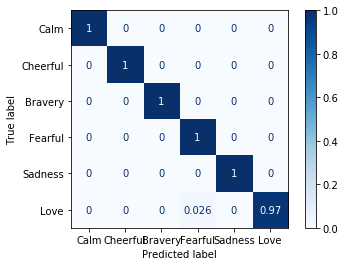

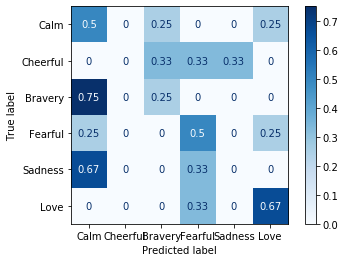

In [5]:
print_res("Vanilla",x_train,y_train,random_search_nu)
test_res("Vanilla",x_val,y_val,random_search_nu)

Best Score: 0.8013
break_ties => False
kernel => rbf
max_iter => 400
nu => 0.04873115106012871
probability => False
shrinking => True
Splits: 10
Random Oversampling Train Accuracy: 99.8667%
Random Oversampling Validation Accuracy: 33.33%
Random Oversampling F1-score: 0.28


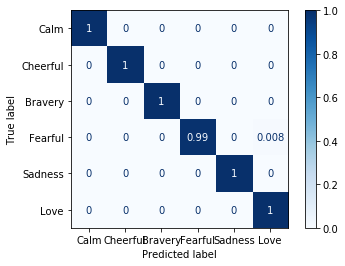

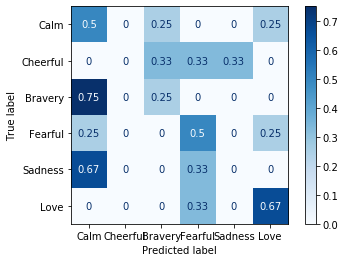

In [6]:
print_res("Random Oversampling",x_os,y_os,random_search_nu)
test_res("Random Oversampling",x_val,y_val,random_search_nu)

Best Score: 0.7893
break_ties => True
kernel => rbf
max_iter => 400
nu => 0.001802952669212199
probability => True
shrinking => False
Splits: 10
SMOTE Train Accuracy: 99.8667%
SMOTE Validation Accuracy: 28.57%
SMOTE F1-score: 0.25


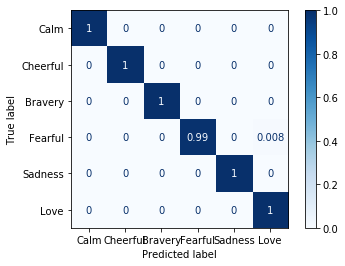

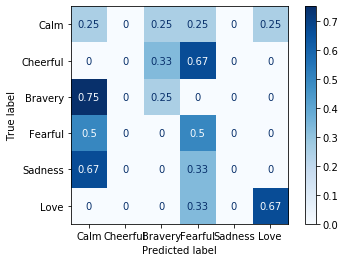

In [7]:
print_res("SMOTE",x_smote,y_smote,random_search_nu)
test_res("SMOTE",x_val,y_val,random_search_nu)

This cell instantiates the SVC object and the hyperparameter search object.

In [4]:
# SVM, Grid Search
k_folds = 10
random_search_iterations = 200
rand_seed = 3249807

parameters = {
    'C': np.logspace(-10,0,100), 
    'gamma': ['scale', 'auto'], 
    'kernel':['linear', 'rbf', 'sigmoid', 'poly'], 
    'shrinking':[True, False], 
    'probability':[True, False],
    'max_iter' : [600],
    'break_ties' : [True, False]
}

svmc = svm.SVC(random_state=rand_seed)
random_search_svm = RandomizedSearchCV(svmc, parameters,\
                                       random_state=rand_seed,\
                                       n_iter=random_search_iterations,\
                                       cv=k_folds,n_jobs=-1)

The following cells are where the SVC model is trained using the imbalanced, oversampled, and SMOTE. They are then validated using the validation set

Best Score: 0.3242
shrinking => False
probability => False
max_iter => 400
kernel => poly
gamma => scale
break_ties => True
C => 0.49770235643321137
Splits: 10
Vanilla Train Accuracy: 43.8903%
Vanilla Validation Accuracy: 14.29%
Vanilla F1-score: 0.05


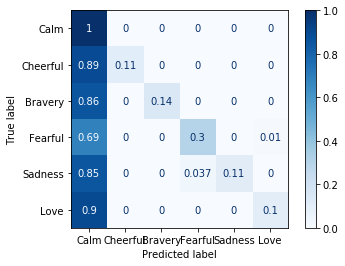

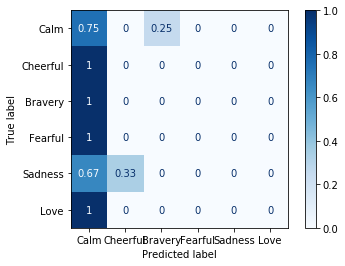

In [9]:
print_res("Vanilla",x_train,y_train,random_search_svm)
test_res("Vanilla",x_val,y_val,random_search_svm)

Best Score: 0.5573
shrinking => True
probability => False
max_iter => 400
kernel => linear
gamma => auto
break_ties => False
C => 0.06135907273413163
Splits: 10
Random Oversampling Train Accuracy: 69.7333%
Random Oversampling Validation Accuracy: 23.81%
Random Oversampling F1-score: 0.21


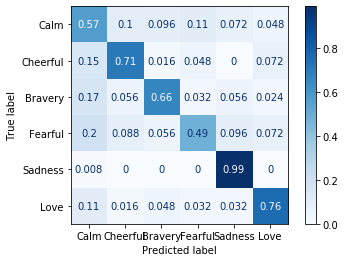

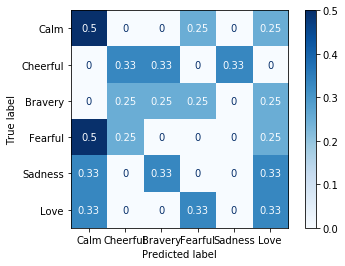

In [10]:
print_res("Random Oversampling",x_os,y_os,random_search_svm)
test_res("Random Oversampling",x_val,y_val,random_search_svm)

Best Score: 0.5653
shrinking => True
probability => False
max_iter => 400
kernel => linear
gamma => auto
break_ties => False
C => 0.19630406500402683
Splits: 10
SMOTE Train Accuracy: 70.1333%
SMOTE Validation Accuracy: 4.76%
SMOTE F1-score: 0.05


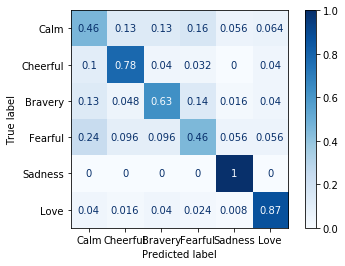

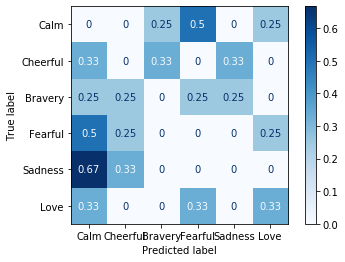

In [5]:
print_res("SMOTE",x_smote,y_smote,random_search_svm)
test_res("SMOTE",x_val,y_val,random_search_svm)

This cell instantiates the LinearSVC object and the hyperparameter search object.

In [4]:
# LinearSVM, Randomized Search
k_folds = 10
random_search_iterations = 200
rand_seed = 3249807

parameters = {
    'penalty':['l1', 'l2'],
    'loss':['hinge', 'squared_hinge'], 
    'dual':[True, False], 
    'C': np.logspace(-10,0,100), 
    'multi_class':['ovr', 'crammer_singer'], 
    'fit_intercept' : [True,False],
    'max_iter':[600]
}

linearsvm = svm.LinearSVC(random_state=rand_seed)
random_search_linear = RandomizedSearchCV(linearsvm, parameters,\
                                          random_state=rand_seed,\
                                          n_iter=random_search_iterations,\
                                          cv=k_folds,n_jobs=-1)

The following cells are where the LinearSVC model is trained using the imbalanced, oversampled, and SMOTE. They are then validated using the validation set

Best Score: 0.3167
penalty => l1
multi_class => ovr
max_iter => 400
loss => squared_hinge
fit_intercept => False
dual => False
C => 0.012045035402587835
Splits: 10
Vanilla Train Accuracy: 33.9152%
Vanilla Validation Accuracy: 14.29%
Vanilla F1-score: 0.05


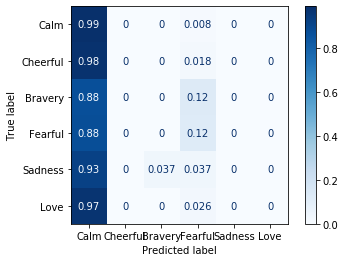

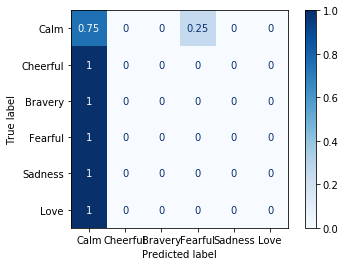

In [7]:
print_res("Vanilla",x_train,y_train,random_search_linear)
test_res("Vanilla",x_val,y_val,random_search_linear)

Best Score: 0.5800
penalty => l2
multi_class => crammer_singer
max_iter => 600
loss => squared_hinge
fit_intercept => True
dual => False
C => 0.49770235643321137
Splits: 10
Random Oversampling Train Accuracy: 74.1333%
Random Oversampling Validation Accuracy: 19.05%
Random Oversampling F1-score: 0.16


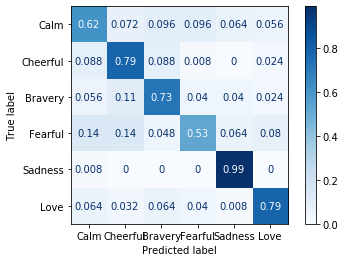

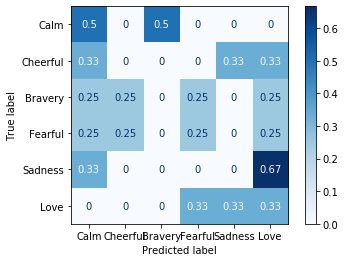

In [5]:
print_res("Random Oversampling",x_os,y_os,random_search_linear)
test_res("Random Oversampling",x_val,y_val,random_search_linear)

Best Score: 0.5627
penalty => l1
multi_class => crammer_singer
max_iter => 600
loss => squared_hinge
fit_intercept => False
dual => False
C => 0.49770235643321137
Splits: 10
SMOTE Train Accuracy: 73.6000%
SMOTE Validation Accuracy: 14.29%
SMOTE F1-score: 0.12


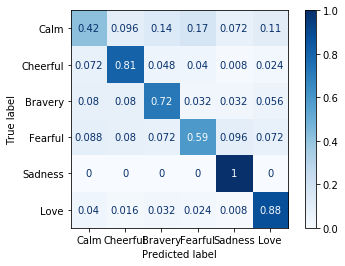

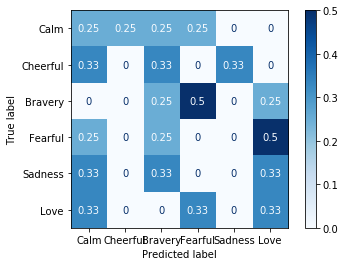

In [6]:
print_res("SMOTE",x_smote,y_smote,random_search_linear)
test_res("SMOTE",x_val,y_val,random_search_linear)